# Comparing the plot from Van Saders 2019 

This plot attempts to recreate Figure 2 from Van Saders 2019 in order to see if we have replicated the population selection of this paper. 

In [ ]:
# Import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde

In [13]:
# Import data for plot 
trilegal = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_trilegal_data/final_trilegal_master.csv')
print(len(trilegal))
kepler = trilegal['Kepler']
teff = trilegal['logTe']

194418


In [14]:
# From SE - Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
plt.figure(figsize=(10, 10))
nbins=500
k = kde.gaussian_kde([teff,kepler])
xi, yi = np.mgrid[teff.min():teff.max():nbins*1j, kepler.min():kepler.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

<Figure size 720x720 with 0 Axes>

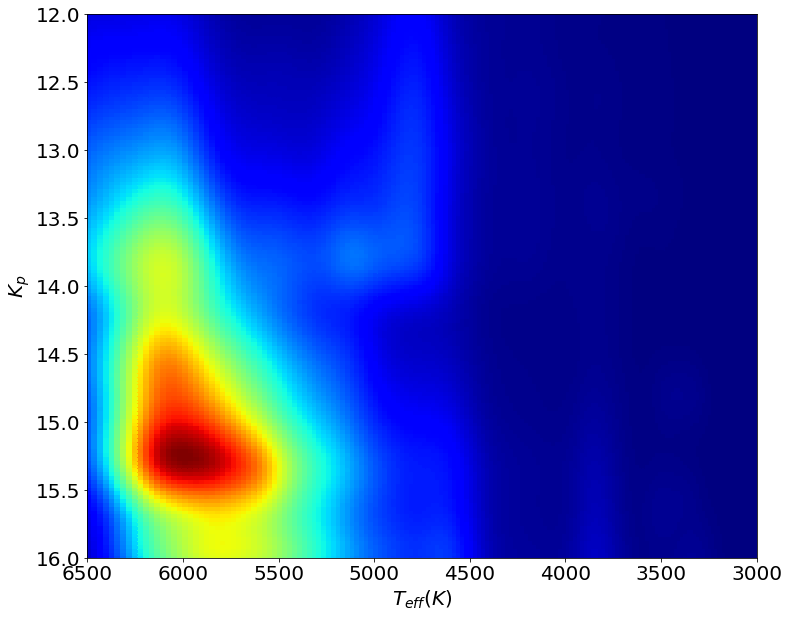

In [15]:
# Make the plot
plt.figure(figsize=(12, 10))
plt.pcolormesh(10**xi, yi, zi.reshape(xi.shape), cmap='jet')
plt.ylim(16, 12)
plt.xlim(6500,3000)
plt.ylabel(r'$K_p$', fontsize=20)
plt.xlabel(r'$T_{eff}(K)$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_compare_to_jvs_2019.png')
plt.show()